In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
df = pd.read_csv("50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


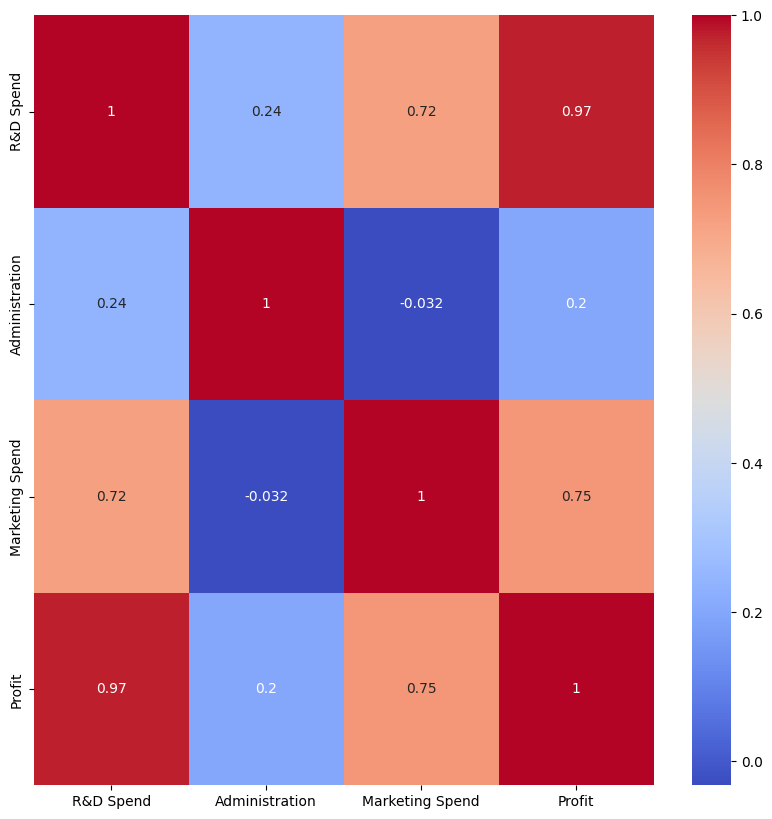

In [5]:
numeric_df = df.select_dtypes(include="number")
plt.figure(figsize = (10,10))
sb.heatmap(numeric_df.corr(),annot= True,cmap="coolwarm")
plt.show()

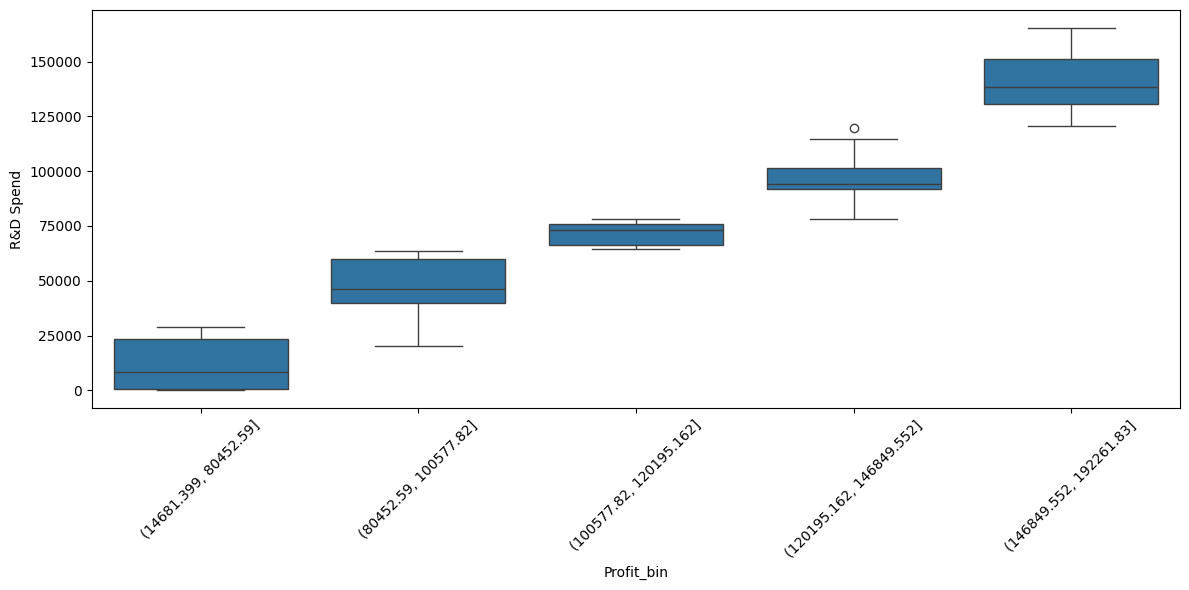

In [6]:
df['Profit_bin'] = pd.qcut(df['Profit'], q=5)

plt.figure(figsize=(12, 6))
sb.boxplot(x='Profit_bin', y='R&D Spend', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

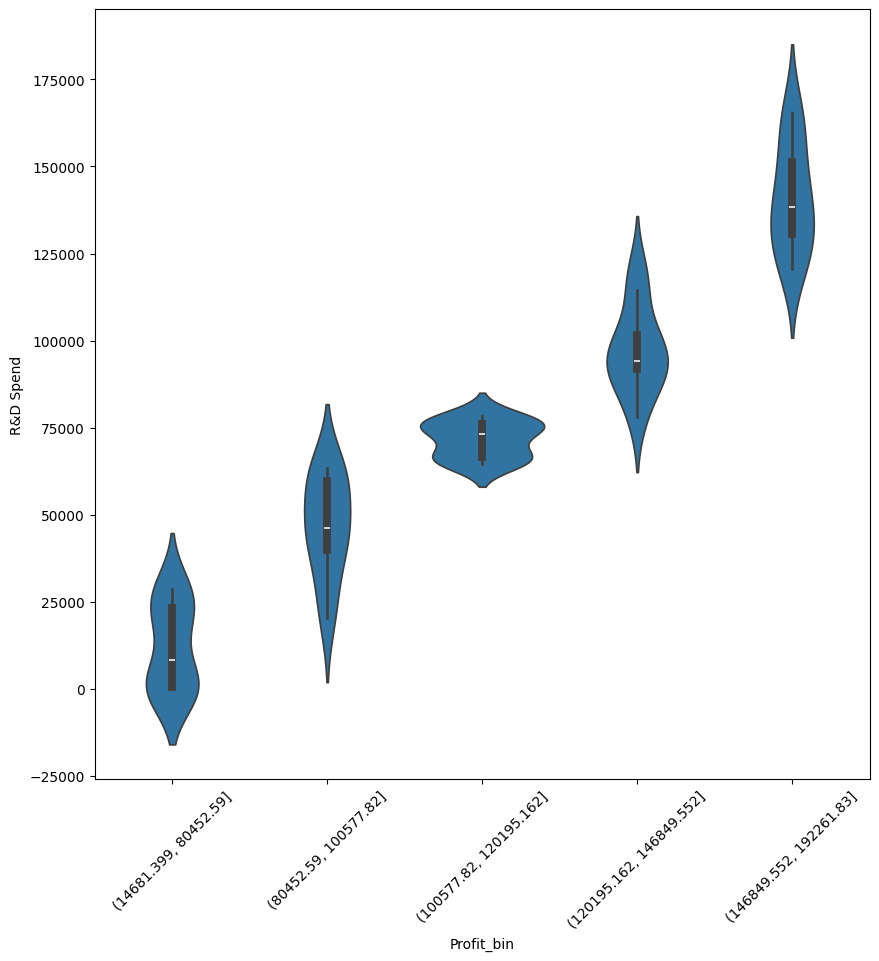

In [7]:
plt.figure(figsize=(10,10))
sb.violinplot(x="Profit_bin",y="R&D Spend",data = df)
plt.xticks(rotation=45)
plt.show()

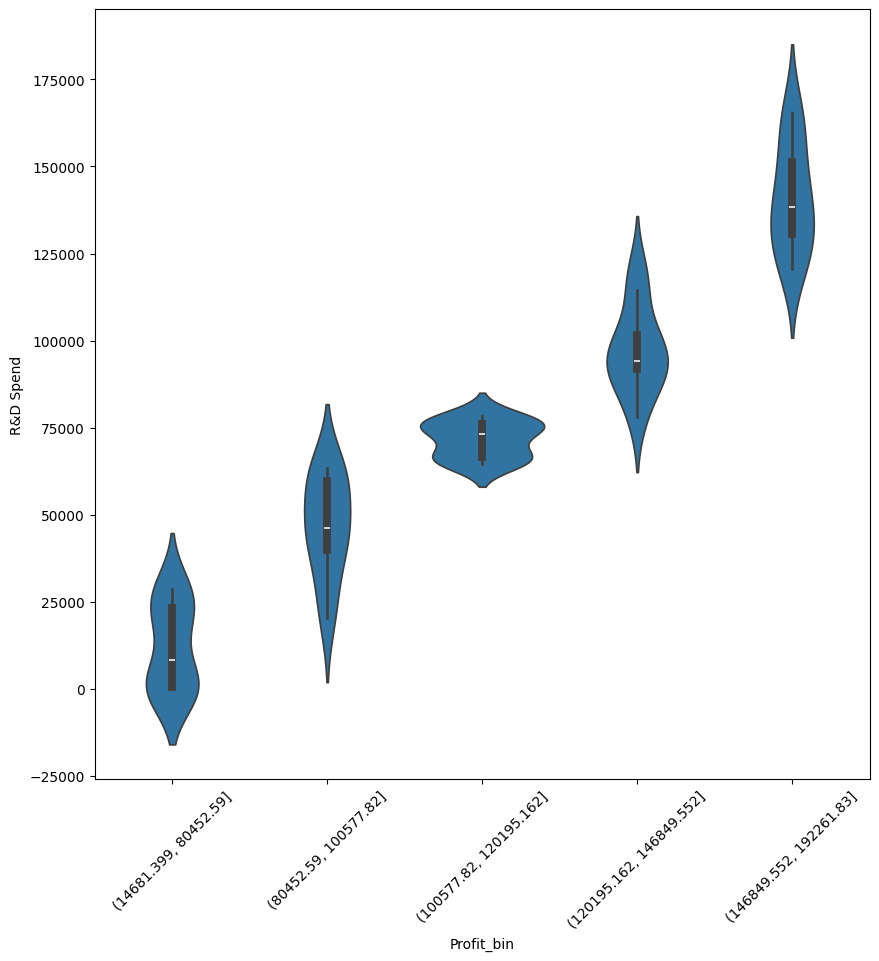

In [8]:
plt.figure(figsize=(10,10))
sb.violinplot(x="Profit_bin",y="R&D Spend",data=df)
plt.xticks(rotation=45)
plt.show()

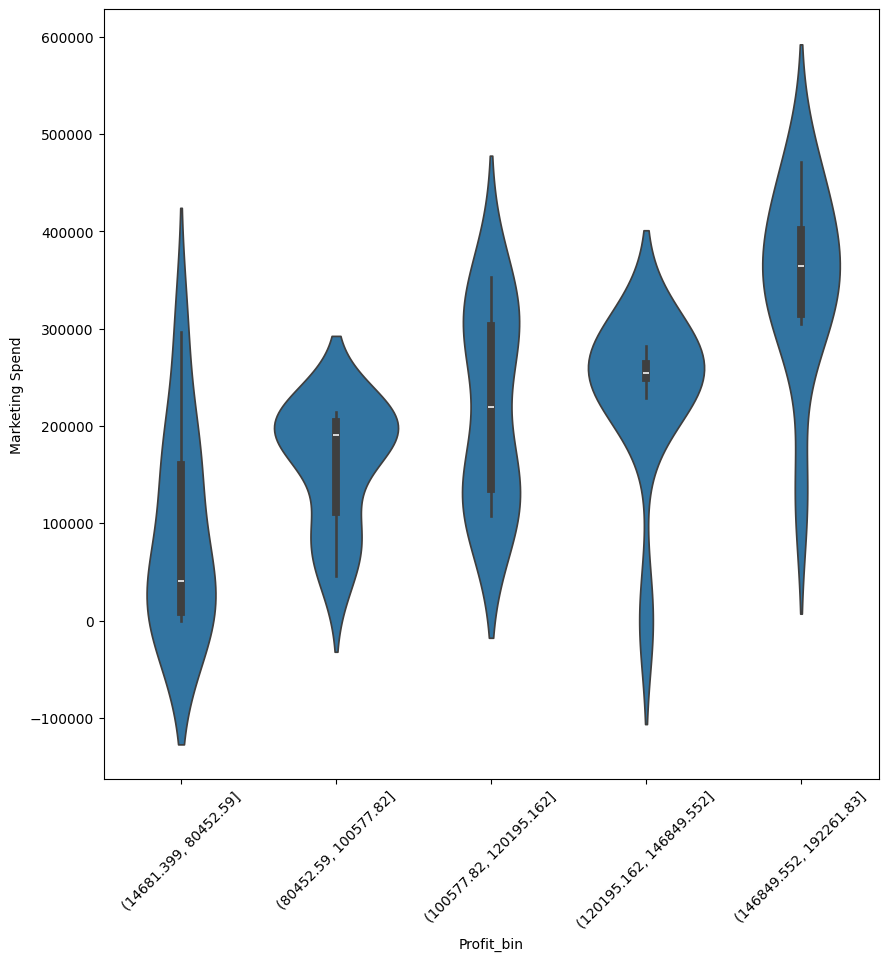

In [9]:
plt.figure(figsize=(10,10))
sb.violinplot(x="Profit_bin",y="Marketing Spend",data=df)
plt.xticks(rotation=45)
plt.show()

In [10]:
x_dataset = df[['R&D Spend','Marketing Spend']]
x_dataset

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42
5,131876.90,362861.36
6,134615.46,127716.82
7,130298.13,323876.68
8,120542.52,311613.29
9,123334.88,304981.62


In [11]:
y_dataset = df[['Profit']]
y_dataset

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [12]:
train_x,test_x,train_y,test_y = train_test_split(x_dataset,y_dataset)
test_x

,R&D Spend,Marketing Spend
41,27892.92,164470.71
18,91749.16,294919.57
6,134615.46,127716.82
48,542.05,0.00
35,46014.02,205517.64
5,131876.90,362861.36
39,38558.51,174999.30
16,78013.11,264346.06
9,123334.88,304981.62
33,55493.95,214634.81


In [13]:
linear = LinearRegression()
linear.fit(train_x,train_y)
y_predict = linear.predict(test_x)
mse = mean_squared_error(test_y,y_predict)
r2 = r2_score(test_y,y_predict)
print(r2)

0.9677194770480724


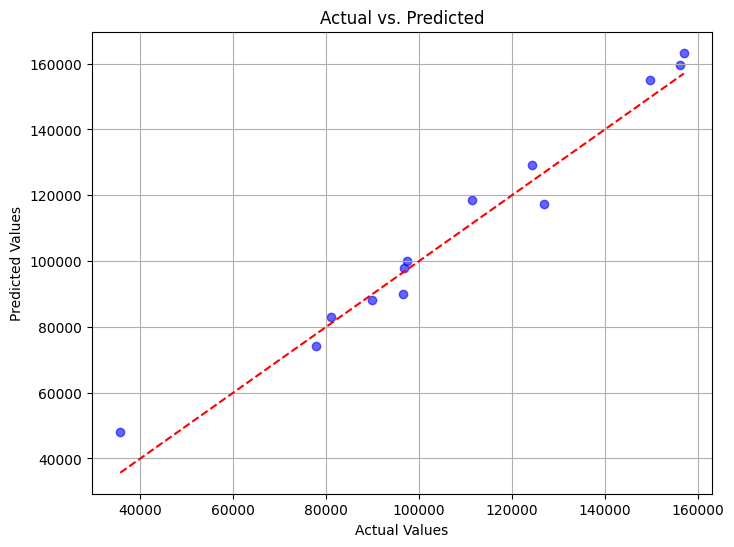

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(test_y, y_predict, color='blue', alpha=0.6)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color='red', linestyle='--')  # perfect line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()


In [15]:
rf = RandomForestRegressor()
rf.fit(train_x,train_y)
y_predict = rf.predict(test_x)
print(r2_score(test_y,y_predict))

c:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9508216261600217
